**Exploratory Data Analysis of the final Plants of the World Online and Wikipedia datasets.**

- For the species' descriptions, we analyze the distribution of word count and analyze the most common words of the corpus.
- For the species' traits, we analyze the trait coverage, as well as within trait class distribution.

# Libraries & Functions

In [1]:
'''Math & Data Libraries'''
import numpy as np
import pandas as pd

In [2]:
'''Visualization Libraries'''
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

sns.set_style("whitegrid", {"grid.color": "0.5", "axes.edgecolor": "0.2"})
color_palette = [ "#007597", "#FF8853", "#C1C36D", "#FFE174","#00A697", "#BC97E0", "#ffc0bf"]
sns.set_palette(sns.color_palette(color_palette))

In [3]:
'''NLP Libraries'''
import nltk
from nltk import ngrams, FreqDist
from wordcloud import WordCloud, ImageColorGenerator

In [4]:
''' Miscellaneous Libraries'''
from tqdm import tqdm

# Input Data

## Plants of the World Online - POWO GIFT

In [5]:
df_POWO_GIFT = pd.read_excel("../Data//Final Databases//POWO_GIFT.xlsx")

## Wikipedia - WIKI GIFT

In [6]:
df_WIKI_GIFT = pd.read_excel("../Data//Final Databases//WIKI_GIFT.xlsx")

## Statistics

In [29]:
for df_name, df in zip(["POWO", "WIKI"], [df_POWO_GIFT, df_WIKI_GIFT]): 
    print("Dataset {}".format(df_name))
    print("\tAverage number of description categories per species: {} ({})".format(np.mean(df[f"{df_name}_id_N"]), np.std(df[f"{df_name}_id_N"])))

Dataset POWO
	Average number of description categories per species: 4.864600767527176 (5.8381097115934155)
Dataset WIKI
	Average number of description categories per species: 3.50410742212076 (3.0993821042413146)


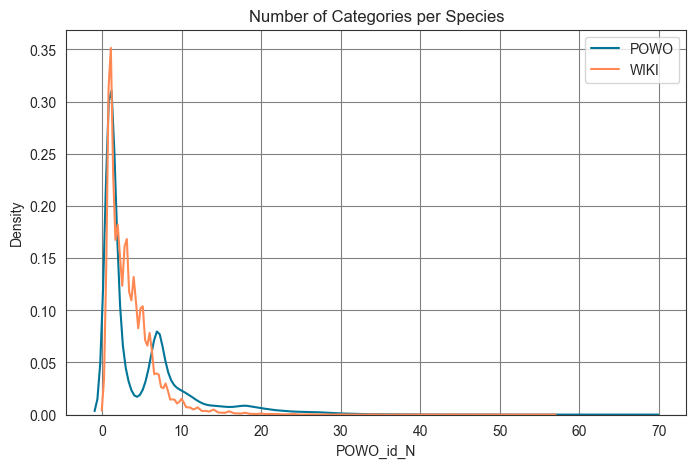

In [20]:
plt.subplots(figsize = (8,5), ncols=1, nrows=1)
plt.title("Number of Categories per Species")
for df_name, df in zip(["POWO", "WIKI"], [df_POWO_GIFT, df_WIKI_GIFT]): 
    sns.kdeplot(df[f"{df_name}_id_N"], label = df_name)
plt.legend()
plt.show()

# Description Word Count & Character Count Analysis 

## Description Character Count

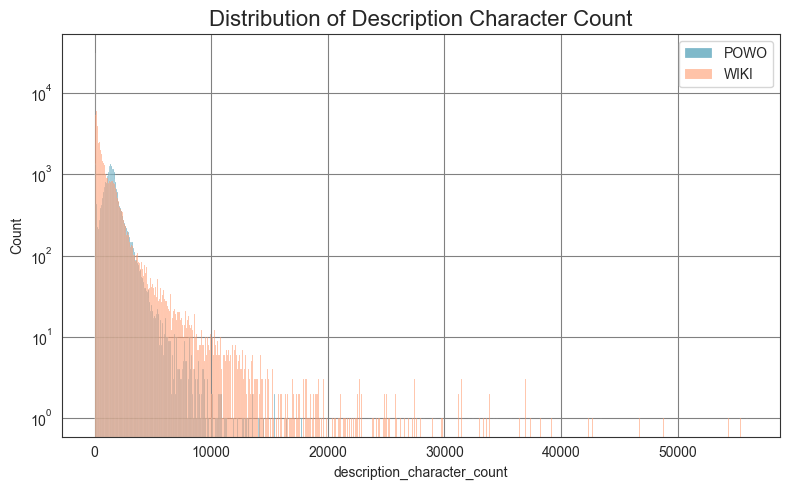

In [25]:
fig, ax = plt.subplots(figsize=(8,5), nrows = 1)
plt.title("Distribution of Description Character Count", fontsize=16)

for df_name, df in zip(["POWO", "WIKI"], [df_POWO_GIFT, df_WIKI_GIFT]): 
    sns.histplot(df["description_character_count"], alpha = 0.5, label = df_name)

# plt.xscale('log')
plt.yscale("log")
plt.legend()
plt.tight_layout()
plt.show()

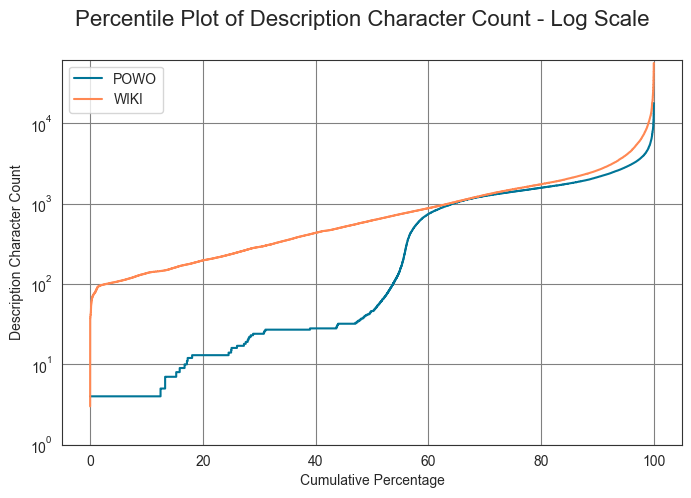

In [28]:
fig, ax = plt.subplots(figsize=(8,5), nrows = 1)
plt.suptitle("Percentile Plot of Description Character Count - Log Scale", fontsize=16)
for df_name, df in zip(["POWO", "WIKI"], [df_POWO_GIFT, df_WIKI_GIFT]): 
    sorted_data = np.sort(df["description_character_count"]) 
    plt.step(100*np.arange(sorted_data.size)/sorted_data.size, sorted_data, label = df_name)

plt.xlabel("Cumulative Percentage")
plt.ylabel("Description Character Count")
plt.yscale("log")
plt.ylim(1, np.max(sorted_data)*1.1)
plt.legend()
plt.show()

## Description Word Count

In [31]:
for df_name, df in zip(["POWO", "WIKI"], [df_POWO_GIFT, df_WIKI_GIFT]): 
    print("Dataset {}".format(df_name))
    print("Number of descriptions with less than 5 words: {}".format(np.round(np.sum(df["description_word_count"]<5)/len(df["description_word_count"]), 2)))

Dataset POWO
Number of descriptions with less than 5 words: 0.47
Dataset WIKI
Number of descriptions with less than 5 words: 0.0


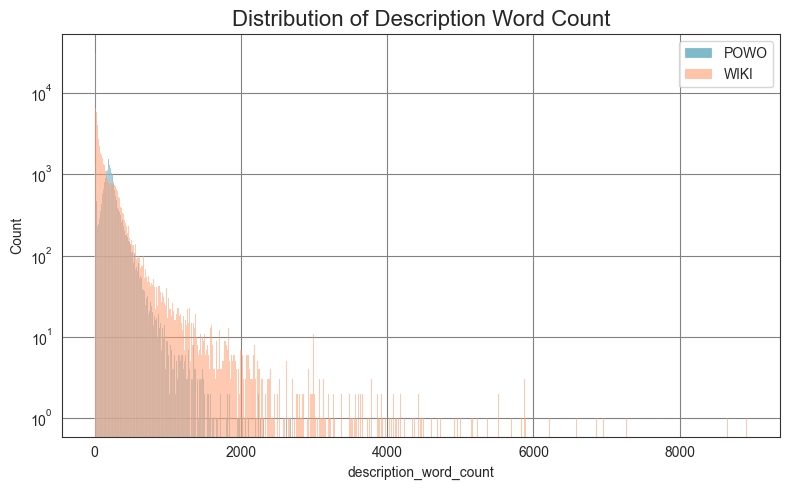

In [32]:
fig, ax = plt.subplots(figsize=(8,5), nrows = 1)
plt.title("Distribution of Description Word Count", fontsize=16)

for df_name, df in zip(["POWO", "WIKI"], [df_POWO_GIFT, df_WIKI_GIFT]): 
    sns.histplot(df["description_word_count"], alpha = 0.5, label = df_name)

# plt.xscale('log')
plt.yscale("log")
plt.legend()
plt.tight_layout()
plt.show()

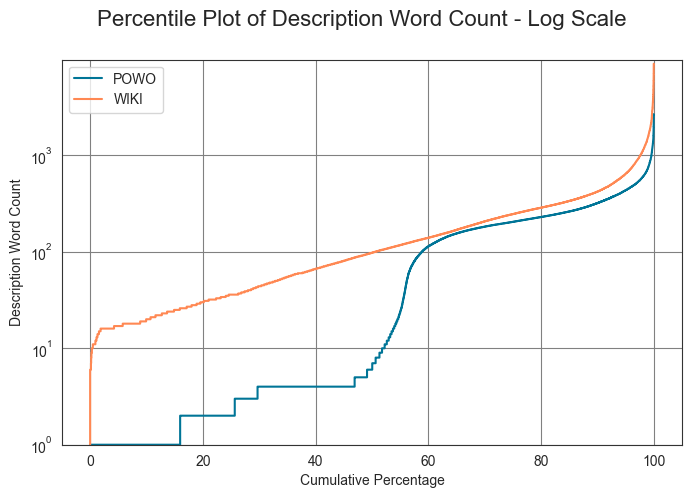

In [33]:
fig, ax = plt.subplots(figsize=(8,5), nrows = 1)
plt.suptitle("Percentile Plot of Description Word Count - Log Scale", fontsize=16)
for df_name, df in zip(["POWO", "WIKI"], [df_POWO_GIFT, df_WIKI_GIFT]): 
    sorted_data = np.sort(df["description_word_count"]) 
    plt.step(100*np.arange(sorted_data.size)/sorted_data.size, sorted_data, label = df_name)

plt.xlabel("Cumulative Percentage")
plt.ylabel("Description Word Count")
plt.yscale("log")
plt.ylim(1, np.max(sorted_data)*1.1)
plt.legend()
plt.show()

# Word Corpus Analysis

In [35]:
description_corpus = dict()
for df_name, df in zip(["POWO", "WIKI"], [df_POWO_GIFT, df_WIKI_GIFT]): 
    description_corpus[df_name] = " ".join(df["BERT_description"].values.astype(str))

In [36]:
word_Freq = dict()
for df_name, df in zip(["POWO", "WIKI"], [df_POWO_GIFT, df_WIKI_GIFT]): 
    word_Freq[df_name] = FreqDist(ngrams(nltk.word_tokenize(description_corpus[df_name]), 1))

In [38]:
for df_name, df in zip(["POWO", "WIKI"], [df_POWO_GIFT, df_WIKI_GIFT]): 
    print("Dataset {}".format(df_name))
    print("\tNumber of Unique Tokens in Corpus: {}".format(len(word_Freq[df_name])))

Dataset POWO
	Number of Unique Tokens in Corpus: 52336
Dataset WIKI
	Number of Unique Tokens in Corpus: 211328


## Token Occurrence
In the POWO dataset 44% of the tokens occur only once and 80% of the tokens occur less than 10 times.
 
In the WIKI dataset 48% of the tokens occur only once and 84% of the tokens occur less than 10 times. (This is probably due to the fact that species names are contained in some descriptions).

POWO
1% 1, 2% 1, 3% 1, 4% 1, 5% 1, 6% 1, 7% 1, 8% 1, 9% 1, 10% 1, 
11% 1, 12% 1, 13% 1, 14% 1, 15% 1, 16% 1, 17% 1, 18% 1, 19% 1, 20% 1, 
21% 1, 22% 1, 23% 1, 24% 1, 25% 1, 26% 1, 27% 1, 28% 1, 29% 1, 30% 1, 
31% 1, 32% 1, 33% 1, 34% 1, 35% 1, 36% 1, 37% 1, 38% 1, 39% 1, 40% 1, 
41% 1, 42% 1, 43% 1, 44% 1, 45% 2, 46% 2, 47% 2, 48% 2, 49% 2, 50% 2, 
51% 2, 52% 2, 53% 2, 54% 2, 55% 2, 56% 2, 57% 2, 58% 2, 59% 3, 60% 3, 
61% 3, 62% 3, 63% 3, 64% 3, 65% 3, 66% 4, 67% 4, 68% 4, 69% 4, 70% 4, 
71% 5, 72% 5, 73% 5, 74% 6, 75% 6, 76% 7, 77% 7, 78% 8, 79% 9, 80% 9, 
81% 10, 82% 11, 83% 12, 84% 14, 85% 15, 86% 17, 87% 19, 88% 23, 89% 27, 90% 32, 
91% 39, 92% 48, 93% 61, 94% 83, 95% 118, 96% 182, 97% 324, 98% 663, 99% 1780, 100% 284807, 

WIKI
1% 1, 2% 1, 3% 1, 4% 1, 5% 1, 6% 1, 7% 1, 8% 1, 9% 1, 10% 1, 
11% 1, 12% 1, 13% 1, 14% 1, 15% 1, 16% 1, 17% 1, 18% 1, 19% 1, 20% 1, 
21% 1, 22% 1, 23% 1, 24% 1, 25% 1, 26% 1, 27% 1, 28% 1, 29% 1, 30% 1, 
31% 1, 32% 1, 33% 1, 34% 1, 35% 1, 36% 1, 37% 1, 38% 

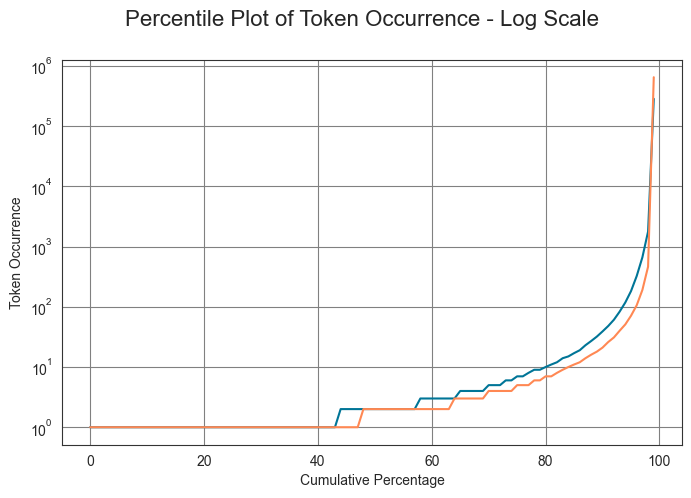

In [40]:
fig, ax = plt.subplots(figsize=(8,5), nrows = 1)
     
for df_name, df in zip(["POWO", "WIKI"], [df_POWO_GIFT, df_WIKI_GIFT]): 
    print(df_name)
    word_Frequencies = list(word_Freq[df_name].values())
    percentile_data = []
    for percentile in np.arange(1,101,1):
        percentile_data.append(np.percentile(word_Frequencies, percentile))
        print(str(percentile)+"%", int(np.percentile(word_Frequencies, percentile)), end=", ")
        if(percentile%10==0):
            print()
    plt.plot(percentile_data[:])
    print()
    
plt.suptitle("Percentile Plot of Token Occurrence - Log Scale", fontsize=16)
plt.xlabel("Cumulative Percentage")
plt.ylabel("Token Occurrence")
plt.yscale("log")
plt.show()

## Word Cloud

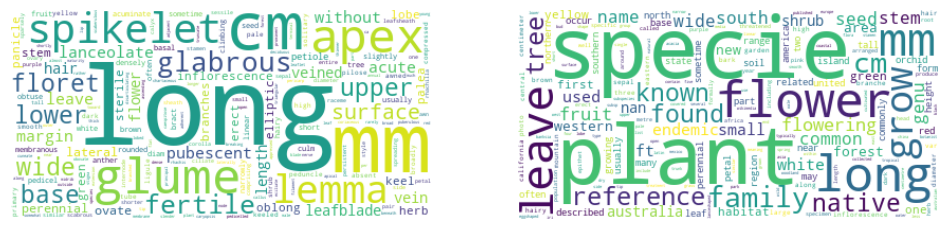

In [44]:
plt.subplots(figsize=(12,9), ncols = 2)
for i, (df_name, df) in enumerate(zip(["POWO", "WIKI"], [df_POWO_GIFT, df_WIKI_GIFT])): 
    plt.subplot(1, 2, i+1)
    wc = WordCloud(collocations=False, background_color="white").generate_from_text(description_corpus[df_name])
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
plt.show()

## Other Information

In [47]:
for i, (df_name, df) in enumerate(zip(["POWO", "WIKI"], [df_POWO_GIFT, df_WIKI_GIFT])): 
    print("Dataset {}".format(df_name))
    print("\tNumber of descriptions containing measurements (mm, cm, ft, dm): {}".format(np.sum(df["BERT_description"].apply(lambda x: (" mm " in str(x)) or (" cm " in str(x)) or (" dm " in str(x)) or (" m " in str(x)) or (" ft " in str(x))))))

Dataset POWO
	Number of descriptions containing measurements (mm, cm, ft, dm): 27135
Dataset WIKI
	Number of descriptions containing measurements (mm, cm, ft, dm): 22738


# Trait Analysis

In [7]:
trait_names_cat = ["Growth_form_1", "Epiphyte_1", "Climber_1", "Lifecycle_1", "Life_form_1"]
traits_cat = ["1.2.1", "1.3.1", "1.4.1", "2.1.1", "2.3.1"]

trait_names_num = ["Plant_height_max", "Leaf_length_max", "Leaf_width_max"]
traits_num = ["1.6.2", "4.6.2", "4.7.2"]

In [28]:
x_values = trait_names_cat + trait_names_num + trait_names_cat + trait_names_num
y_values = [np.sum(df_POWO_GIFT[trait].notna()) for trait in traits_cat + traits_num] + [np.sum(df_WIKI_GIFT[trait].notna()) for trait in traits_cat + traits_num]
y_coverage = [np.round(100*np.sum(df_POWO_GIFT[trait].notna())/df_POWO_GIFT.shape[0], 1) for trait in traits_cat + traits_num] + [np.round(100*np.sum(df_WIKI_GIFT[trait].notna())/df_WIKI_GIFT.shape[0], 1) for trait in traits_cat + traits_num]
hue = ["POWO"]*8 + ["WIKI"]*8

In [29]:
df_trait_coverage = pd.DataFrame(np.vstack([hue, x_values, y_values, y_coverage]).T, columns = ["Dataset", "Trait Name", "Trait Count", "Trait Coverage"])
df_trait_coverage

,Dataset,Trait Name,Trait Count,Trait Coverage
0,POWO,Growth_form_1,46110,78.0
1,POWO,Epiphyte_1,44417,75.1
2,POWO,Climber_1,45608,77.1
3,POWO,Lifecycle_1,36361,61.5
4,POWO,Life_form_1,21400,36.2
5,POWO,Plant_height_max,17648,29.8
6,POWO,Leaf_length_max,3397,5.7
7,POWO,Leaf_width_max,2243,3.8
8,WIKI,Growth_form_1,49535,89.0
9,WIKI,Epiphyte_1,45022,80.9


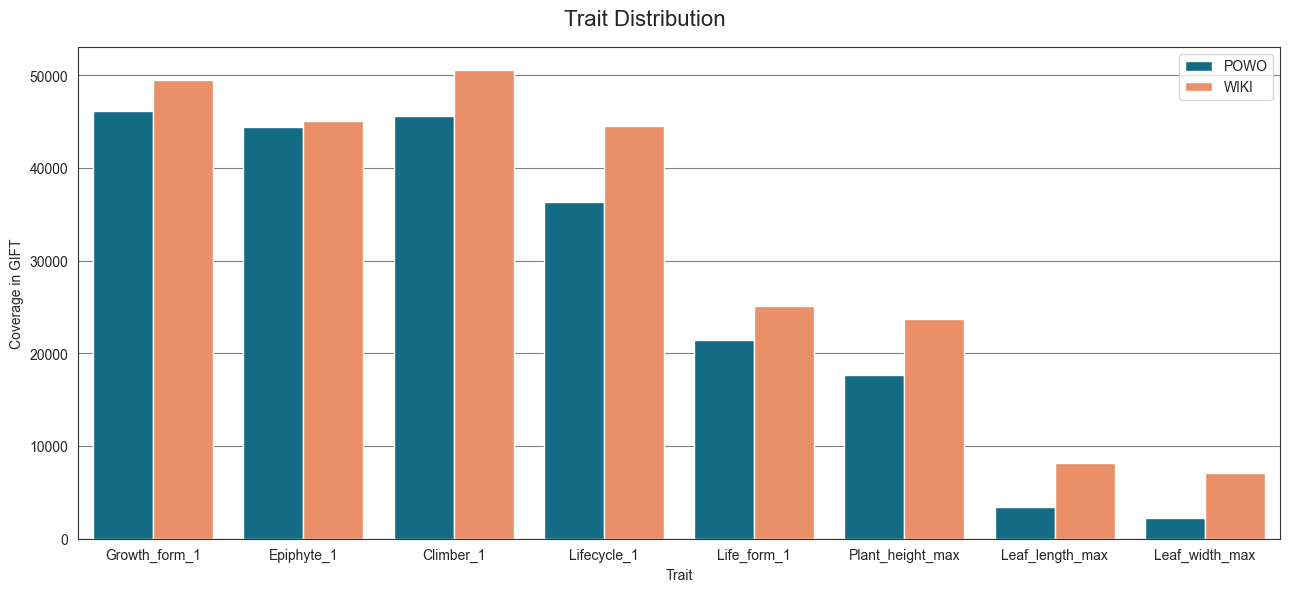

In [66]:
x_values = trait_names_cat + trait_names_num + trait_names_cat + trait_names_num
y_values = [np.sum(df_POWO_GIFT[trait].notna()) for trait in traits_cat + traits_num] + [np.sum(df_WIKI_GIFT[trait].notna()) for trait in traits_cat + traits_num]
hue = ["POWO"]*8 + ["WIKI"]*8

fig, ax = plt.subplots(figsize=(13,6), nrows = 1)
plt.suptitle("Trait Distribution", fontsize=16)
plt.xlabel("Trait")
plt.ylabel("Coverage in GIFT")
sns.barplot(y = y_values, x = x_values, hue = hue)
plt.tight_layout()
plt.show()

# Categorical Trait Analysis

In [17]:
trait_values_dict = {}
trait_values_dict["1.2.1"] = ["herb", "shrub", "tree"]
trait_values_dict["1.3.1"] = ["obligatory", "terrestrial"]
trait_values_dict["1.4.1"] = ["obligatory", "self-supporting"]
trait_values_dict["2.1.1"] = ["annual", "perennial"]
trait_values_dict["2.3.1"] = ["phanerophyte", "chamaephyte", "hemicryptophyte", "cryptophyte", "therophyte"]

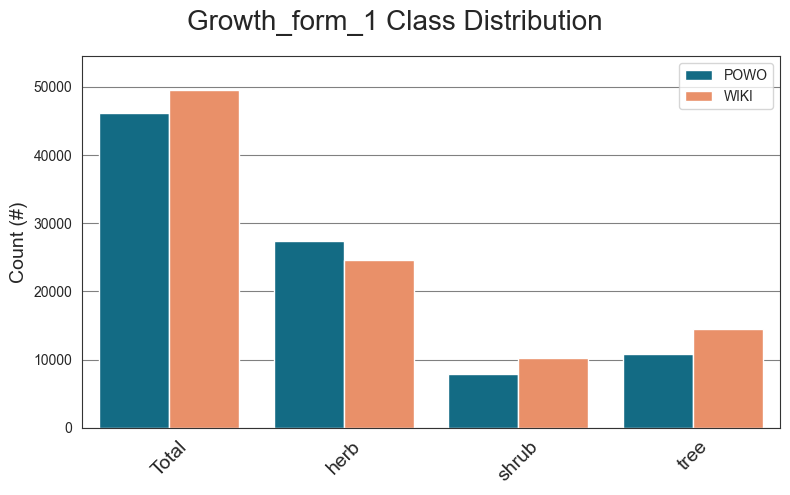

,Dataset,Trait Name,Trait Count,Trait Coverage
0,POWO,Total,46110,1.0
1,POWO,herb,27340,59.3
2,POWO,shrub,7883,17.1
3,POWO,tree,10846,23.5
4,WIKI,Total,49535,1.0
5,WIKI,herb,24655,49.8
6,WIKI,shrub,10314,20.8
7,WIKI,tree,14526,29.3


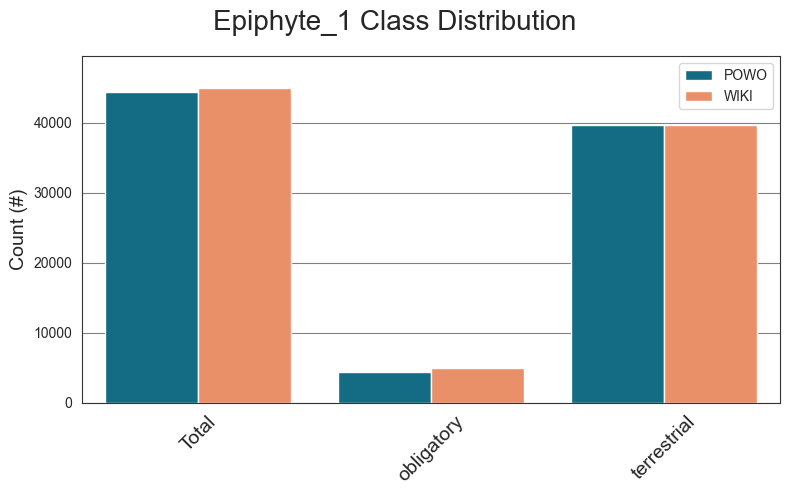

,Dataset,Trait Name,Trait Count,Trait Coverage
0,POWO,Total,44417,1.0
1,POWO,obligatory,4342,9.8
2,POWO,terrestrial,39656,89.3
3,WIKI,Total,45022,1.0
4,WIKI,obligatory,4976,11.1
5,WIKI,terrestrial,39696,88.2


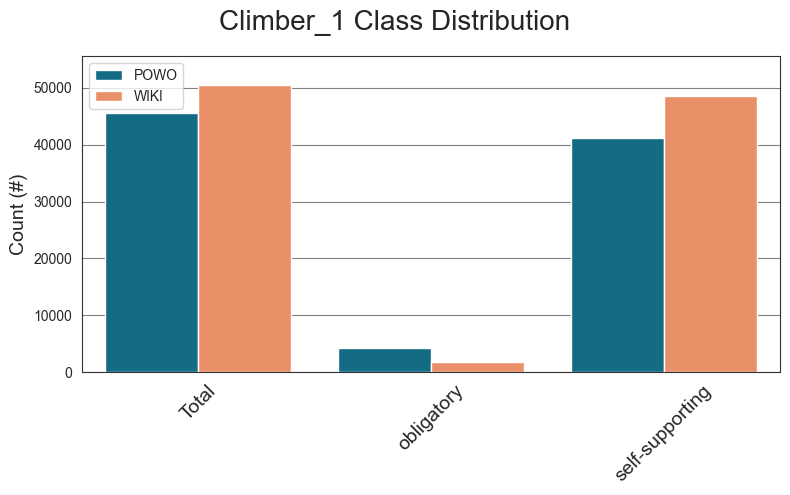

,Dataset,Trait Name,Trait Count,Trait Coverage
0,POWO,Total,45608,1.0
1,POWO,obligatory,4328,9.5
2,POWO,self-supporting,41156,90.2
3,WIKI,Total,50517,1.0
4,WIKI,obligatory,1789,3.5
5,WIKI,self-supporting,48633,96.3


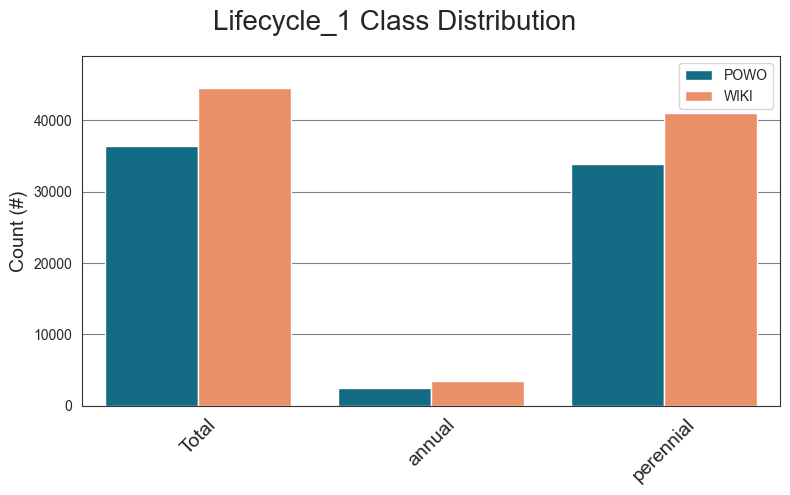

,Dataset,Trait Name,Trait Count,Trait Coverage
0,POWO,Total,36361,1.0
1,POWO,annual,2475,6.8
2,POWO,perennial,33859,93.1
3,WIKI,Total,44569,1.0
4,WIKI,annual,3398,7.6
5,WIKI,perennial,41005,92.0


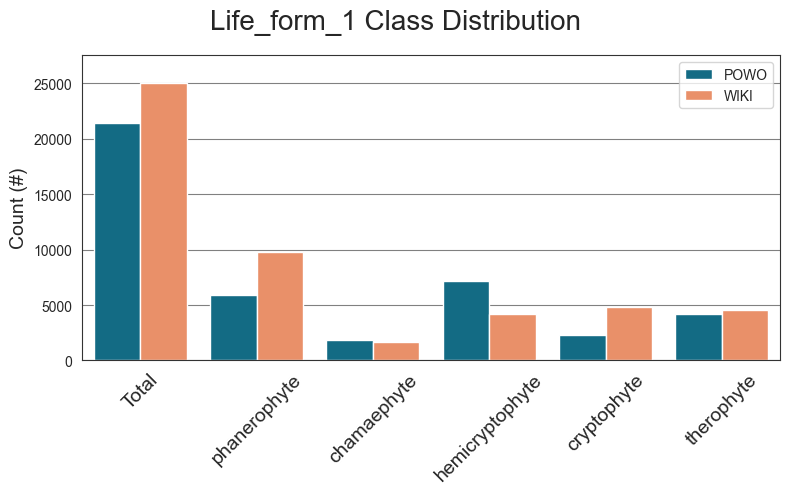

,Dataset,Trait Name,Trait Count,Trait Coverage
0,POWO,Total,21400,1.0
1,POWO,phanerophyte,5922,27.7
2,POWO,chamaephyte,1824,8.5
3,POWO,hemicryptophyte,7195,33.6
4,POWO,cryptophyte,2290,10.7
5,POWO,therophyte,4169,19.5
6,WIKI,Total,25048,1.0
7,WIKI,phanerophyte,9790,39.1
8,WIKI,chamaephyte,1691,6.8
9,WIKI,hemicryptophyte,4147,16.6


In [30]:
for trait_name, trait_code in zip(trait_names_cat, traits_cat):
    fig, axes  = plt.subplots(figsize=(8,5), nrows = 1)

    x_values = ["Total"] + trait_values_dict[trait_code] + ["Total"] + trait_values_dict[trait_code]
    y_values = [df_POWO_GIFT[trait_code].count()] + list(df_POWO_GIFT[trait_code].value_counts()[trait_values_dict[trait_code]]) + [df_WIKI_GIFT[trait_code].count()] + list(df_WIKI_GIFT[trait_code].value_counts()[trait_values_dict[trait_code]])
    y_coverage = [1] + list(np.round(100*df_POWO_GIFT[trait_code].value_counts()[trait_values_dict[trait_code]]/df_POWO_GIFT[trait_code].count(), 1)) + [1] + list(np.round(100*df_WIKI_GIFT[trait_code].value_counts()[trait_values_dict[trait_code]]/df_WIKI_GIFT[trait_code].count(), 1))

    hue = ["POWO"]*(len(x_values)//2) + ["WIKI"]*(len(x_values)//2)
    sns.barplot(y = y_values, x = x_values, hue = hue)
    axes.set_xticklabels(axes.get_xticklabels(), size=14, rotation=45)

    plt.ylim(0, df_WIKI_GIFT[trait_code].count()*1.1)
    plt.ylabel("Count (#)", size=14)
    plt.suptitle("{} Class Distribution".format(trait_name), size=20)
    plt.tight_layout()
    plt.show()
    
    df_trait_class_coverage = pd.DataFrame(np.vstack([hue, x_values, y_values, y_coverage]).T, columns = ["Dataset", "Trait Name", "Trait Count", "Trait Coverage"])
    display(df_trait_class_coverage)

# Numerical Trait Analysis

POWO Plant_height_max 7.42 10.67
WIKI Plant_height_max 6.67 10.82


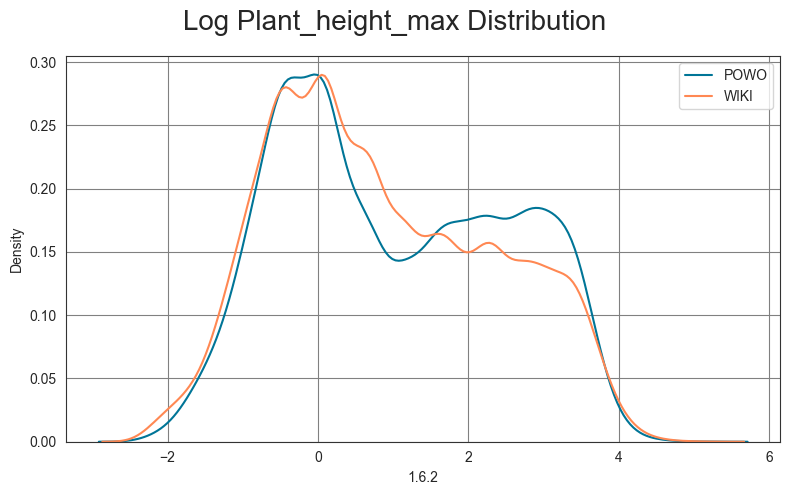

POWO Leaf_length_max 12.87 31.06
WIKI Leaf_length_max 16.1 103.87


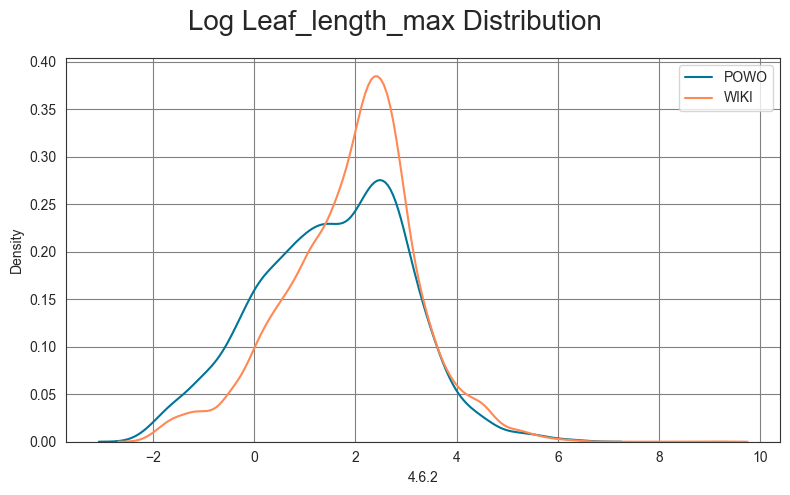

POWO Leaf_width_max 6.54 95.43
WIKI Leaf_width_max 4.92 53.87


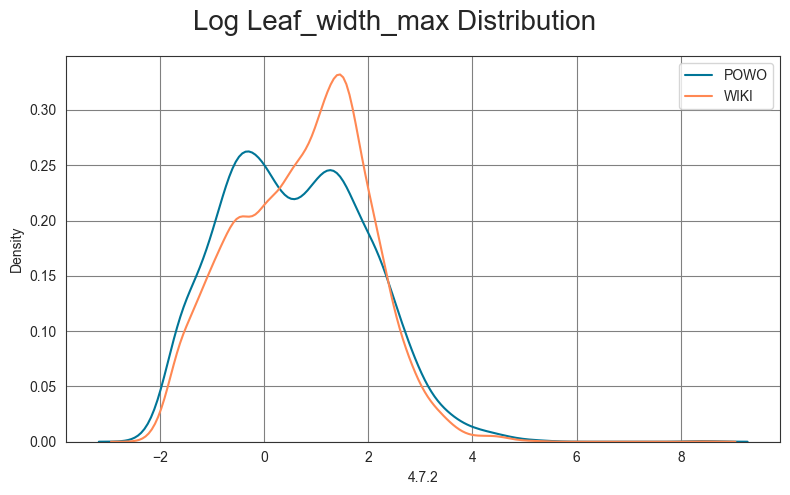

In [32]:
for trait_name, trait_code in zip(trait_names_num, traits_num):
    fig, axes  = plt.subplots(figsize=(8,5), nrows = 1)

    for i, (df_name, df) in enumerate(zip(["POWO", "WIKI"], [df_POWO_GIFT, df_WIKI_GIFT])): 
        sns.kdeplot(np.log(df[df[trait_code].notna()][trait_code]+0.1), label = df_name)
        print(df_name, trait_name, np.round(np.mean(df[df[trait_code].notna()][trait_code]), 2), np.round(np.std(df[df[trait_code].notna()][trait_code]), 2))
    plt.suptitle("Log {} Distribution".format(trait_name), size=20)
    # plt.xscale("log")
    plt.tight_layout()
    plt.legend()
    plt.show()